GRUPO:
MATEUS DA SILVA ROMANI - 156597
VINÍCIUS DA SILVA DIAS - 156736

PRE PROCESSAMENTO DOS DADOS OBTIDOS PELO WEB SCRAPPER EM SCRAPER.IPYNB

# Pre-processing the data

### Importing the libraries

For this project, we will use the following libraries:

In [1]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

Now we must import the data. We will use the dataset gathered from our own web scraping script. The data is stored in a CSV file, which we will import using the Pandas library.

In [2]:
# Load the data
df = pd.read_csv("../site_scrapper/cleaned_data.csv")

# Printing the first 5 rows
df.head()

,stickers,paintwear,name,steam_price,quality,rarity,type,price
0,0,NaN,StatTrak™ Radicals Box,10.13,0,1,Weapon Cases,50.61
1,0,NaN,Tec-9 | Mummy's Rot (Well-Worn),2.08,0,8,Pistols,12.69
2,0,NaN,M4A1-S | Mud-Spec (Minimal Wear),0.59,0,7,Rifles,3.38
3,0,0.133880,P250 | Re.built (Minimal Wear),0.34,0,8,Pistols,1.95
4,0,0.148892,G3SG1 | Scavenger (Minimal Wear),0.93,0,9,Sniper Rifles,5.28


## Cleaning the data

When working with data, an important step is to clean it. This means that we must remove any information that might be irrelevant or that might cause problems in the future. In this case, we will check if there are any invalid values in the dataset and remove them.

In [3]:
# Verifying NaN values
df.isnull().sum()

stickers         0
paintwear      356
name             0
steam_price      0
quality          0
rarity           0
type             0
price            0
dtype: int64

In [4]:
# Dropping NaN values
df = df.dropna()

# Verifying NaN values
df.isnull().sum()

stickers       0
paintwear      0
name           0
steam_price    0
quality        0
rarity         0
type           0
price          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2644 entries, 3 to 2999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stickers     2644 non-null   int64  
 1   paintwear    2644 non-null   float64
 2   name         2644 non-null   object 
 3   steam_price  2644 non-null   float64
 4   quality      2644 non-null   int64  
 5   rarity       2644 non-null   int64  
 6   type         2644 non-null   object 
 7   price        2644 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 185.9+ KB


In [6]:
# Encoding the categorical data
le = LabelEncoder()

df["name"] = le.fit_transform(df["name"])
df["type"] = le.fit_transform(df["type"])

In [ ]:
# # Performing one-hot encoding
# name_encoded = pd.get_dummies(df, prefix="name")
# type_encoded = pd.get_dummies(df, prefix="type")

# df = pd.concat([df, name_encoded, type_encoded], axis=1)

In [ ]:
print(df.tail())

## Standardizing the data

In [7]:
print(df.head())

   stickers  paintwear  name  steam_price  quality  rarity  type  price
3         0   0.133880    10         0.34        0       8     0   1.95
4         0   0.148892     2         0.93        0       9     4   5.28
5         0   0.314602    12         0.37        0       7     4   2.09
6         0   0.102729    11         0.32        0       8     1   1.99
8         0   0.347333     6         0.37        0       9     3   1.99


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# standardized_data = scaler.fit_transform(df)

# df = pd.DataFrame(standardized_data, columns=df.columns)

In [8]:
mean = np.mean(df, axis=0)
std = np.std(df, axis=0)

df = (df - mean) / std

In [9]:
print(df.head())

   stickers  paintwear      name  steam_price   quality    rarity      type  \
3 -0.446138  -0.857974  0.300033    -0.722527 -0.444369 -0.627270 -0.997250   
4 -0.446138  -0.754948 -1.245581    -0.593157 -0.444369  0.157262  1.726644   
5 -0.446138   0.382272  0.686436    -0.715949 -0.444369 -1.411802  1.726644   
6 -0.446138  -1.071752  0.493234    -0.726913 -0.444369 -0.627270 -0.316277   
8 -0.446138   0.606899 -0.472774    -0.715949 -0.444369  0.157262  1.045670   

      price  
3 -0.717666  
4 -0.581862  
5 -0.711957  
6 -0.716035  
8 -0.716035  


In [10]:
fig = px.scatter_matrix(df, dimensions=df.columns)
fig.update_layout(
    title="Scatter plot of all the features",
    autosize=True,
    width=1000,
    height=1000,
)
fig.update_yaxes(automargin=True)

fig.show()

In [11]:
# Table of correlation
df.corr()

,stickers,paintwear,name,steam_price,quality,rarity,type,price
stickers,1.000000,0.085063,-0.242184,0.394706,0.093082,0.267218,0.155589,0.393635
paintwear,0.085063,1.000000,0.223560,0.120200,0.367861,0.315311,-0.008737,0.119468
name,-0.242184,0.223560,1.000000,0.125906,0.473980,-0.144181,-0.415942,0.140220
steam_price,0.394706,0.120200,0.125906,1.000000,0.620777,0.667633,-0.266751,0.998331
quality,0.093082,0.367861,0.473980,0.620777,1.000000,0.201016,-0.244650,0.618746
rarity,0.267218,0.315311,-0.144181,0.667633,0.201016,1.000000,-0.198391,0.660627
type,0.155589,-0.008737,-0.415942,-0.266751,-0.244650,-0.198391,1.000000,-0.265885
price,0.393635,0.119468,0.140220,0.998331,0.618746,0.660627,-0.265885,1.000000


<Axes: >

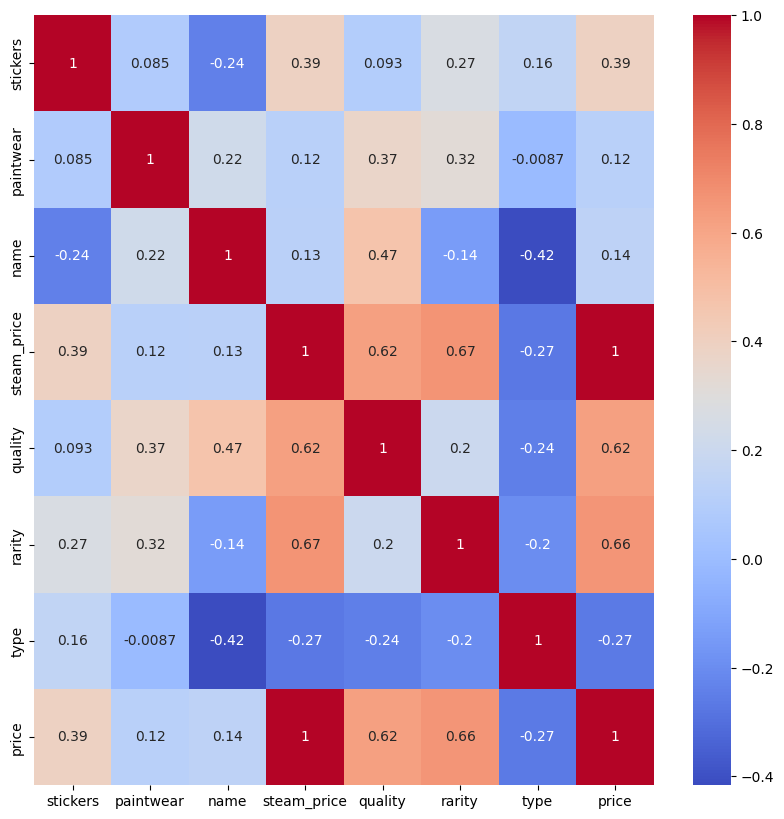

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")